In [12]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///hawaii.sqlite")


In [8]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)


In [9]:
# View all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [10]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [11]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.

recent_date=session.query(Measurement).order_by(Measurement.date.desc()).first()
recent_date.date

'2017-08-23'

<AxesSubplot:xlabel='date'>

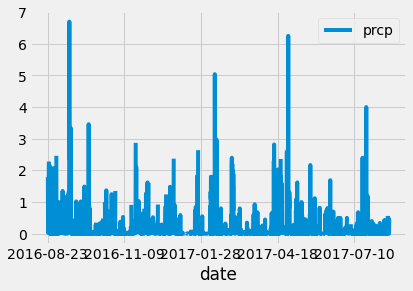

In [131]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores

year_ago_data=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-22')

# Save the query results as a Pandas DataFrame and set the index to the date column

year_ago_data_df=pd.DataFrame(year_ago_data, columns=['date','prcp'])
index_date=year_ago_data_df.set_index('date')
                                             
# Sort the dataframe by date

sorted_dates=index_date.sort_values('date')
sorted_dates

# Use Pandas Plotting with Matplotlib to plot the data

sorted_dates.plot()


In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data

year_ago_data_df['prcp'].describe()


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [68]:
# Design a query to calculate the total number stations in the dataset

total_stations=session.query(Station.station).count()
print(f"There are {total_stations} total stations.")


There are 9 total stations.


In [91]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

active_stations=session.query(func.count(Measurement.station),Measurement.station).group_by(Measurement.station).all()

# List the stations and the counts in descending order.

active_stations.sort(reverse=True)
active_stations


[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [103]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

lowest_temp=session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(f"The lowest temperature for station USC00519281 is {lowest_temp}.")

highest_temp=session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(f"The highest temperature for station USC00519281 is {highest_temp}.")

avg_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(f"The average temperature for station USC00519281 is {avg_temp}.")

The lowest temperature for station USC00519281 is [(54.0,)].
The highest temperature for station USC00519281 is [(85.0,)].
The average temperature for station USC00519281 is [(71.66378066378067,)].


Text(0, 0.5, 'Frequency')

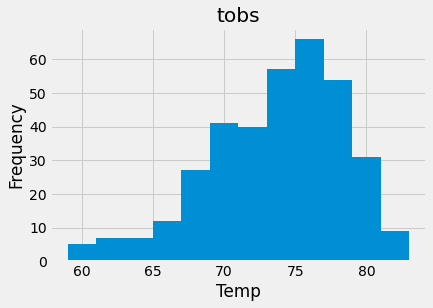

In [124]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

recent_date_active=session.query(Measurement).filter(Measurement.station=='USC00519281').order_by(Measurement.date.desc()).first()
recent_date_active.date

year_ago_active = dt.date(2017,8,18) - dt.timedelta(days=365)
year_ago_active

year_ago_data_active=session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date > '2016-08-18')
year_ago_data_active.all()

year_ago_data_active_df=pd.DataFrame(year_ago_data_active, columns=['date','tobs'])
year_ago_data_active_df.head()

year_ago_data_active_df.hist(bins=12)
plt.xlabel('Temp')
plt.ylabel('Frequency')




# Close session

In [ ]:
# Close Session
session.close()